# Generate LSST filter transmission into PySynPhot
=========================================================================


The purpose is to start to use PySynPhot software to calculate things on
SED, filter transmission,... For Calibration

- Sylvie Dagoret-Campagne
- Affiliation LAL-IN2P3-CNRS
- Work : LSST & StarDice
- date May 1st 2017

In [144]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
import pandas as pd
import os
import re

In [146]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [147]:
os.environ['PYSYN_CDBS']

'/Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs'

In [148]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

In [149]:
dir(S)

['ArrayBandpass',
 'ArraySpectrum',
 'BlackBody',
 'Box',
 'Cache',
 'Extinction',
 'FileBandpass',
 'FileSpectrum',
 'FlatSpectrum',
 'GaussianSource',
 'Icat',
 'ObsBandpass',
 'Observation',
 'Obsmode',
 'PowerLaw',
 'UniformTransmission',
 'Vega',
 'Waveset',
 '__build_date__',
 '__build_status__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__full_svn_info__',
 '__name__',
 '__package__',
 '__path__',
 '__svn_full_info__',
 '__svn_revision__',
 '__svn_version__',
 '__version__',
 '__version_commit__',
 '__version_date__',
 '__version_dirty__',
 '__version_long__',
 '__version_post__',
 '__version_short__',
 'absolute_import',
 'binning',
 'catalog',
 'exceptions',
 'extinction',
 'get_data_filename',
 'getref',
 'locations',
 'obsbandpass',
 'observation',
 'observationmode',
 'parse_spec',
 'planck',
 'primary_area',
 'pysynphot_utils',
 'reddening',
 'refs',
 'setref',
 'showref',
 'spark',
 'spectrum',
 'spparser',
 'tables',
 'units',
 'version',
 'wavetable']

In [150]:
plt.ion()
plt.clf()

In [151]:
detdatafilename='LSST_data/transmissions-LSST.dat'

In [152]:
df=pd.read_csv(detdatafilename,names=['wl','Topt','Tccd','U','G','R','I','Z','Y4','atm'],sep='\t')

In [153]:
wl=np.asarray(df['wl'])*10  # in Angstrom
u=np.asarray(df['U'])*0.01
g=np.asarray(df['G'])*0.01
r=np.asarray(df['R'])*0.01
i=np.asarray(df['I'])*0.01
z=np.asarray(df['Z'])*0.01
y4=np.asarray(df['Y4'])*0.01
atm=np.asarray(df['atm'])*0.01

In [154]:
y4[np.where(wl>11000)]=0

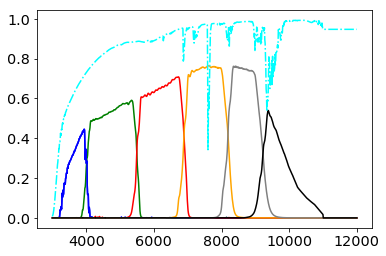

In [155]:
plt.plot(wl,u,'b')
plt.plot(wl,g,'g')
plt.plot(wl,u,'b')
plt.plot(wl,r,'r')
plt.plot(wl,i,color='orange')
plt.plot(wl,z,color='grey')
plt.plot(wl,y4,color='k')
plt.plot(wl,atm,color='cyan',ls='-.')

In [156]:
bp_u = S.ArrayBandpass(wl,u, name='LSST_U')
bp_g = S.ArrayBandpass(wl,g, name='LSST_G')
bp_r = S.ArrayBandpass(wl,r, name='LSST_R')
bp_i = S.ArrayBandpass(wl,i, name='LSST_I')
bp_z = S.ArrayBandpass(wl,z, name='LSST_Z')
bp_y4 = S.ArrayBandpass(wl,y4, name='LSST_Y4')
bp_atm= S.ArrayBandpass(wl,atm, name='LSST_ATM')
#print bp_u.throughput
#print bp_u.sample(3500)
#print bp_u.sample(3800)

In [197]:
bp_u_atm = S.ArrayBandpass(wave=wl,throughput=u*atm, name='LSST_U_ATM')
bp_g_atm = S.ArrayBandpass(wl,g*atm, name='LSST_G_ATM')
bp_r_atm = S.ArrayBandpass(wl,r*atm, name='LSST_R_ATM')
bp_i_atm = S.ArrayBandpass(wl,i*atm, name='LSST_I_ATM')
bp_z_atm = S.ArrayBandpass(wl,z*atm, name='LSST_Z_ATM')
bp_y4_atm = S.ArrayBandpass(wl,y4*atm, name='LSST_Y4_ATM')

In [189]:
bp_u_atm.binning=10
bp_g_atm.binning=10
bp_r_atm.binning=10
bp_i_atm.binning=10
bp_z_atm.binning=10
bp_y4_atm.binning=10
bp_u_atm.primary_area=6*1e4

In [196]:
S.ArrayBandpass?

In [159]:
#bp = S.ObsBandpass('LSST_G_ATM,LSST_R_ATM,LSST_I_ATM,LSST_Z_ATM')
#other_bp = S.ObsBandpass('LSST_U_ATM,LSST_Y4_ATM')
#bp.check_overlap(other_bp)
box_bp = S.Box(2000, 10000)
bp_u.check_overlap(box_bp)

'partial'

In [160]:
bp_u.check_sig(box_bp)

True

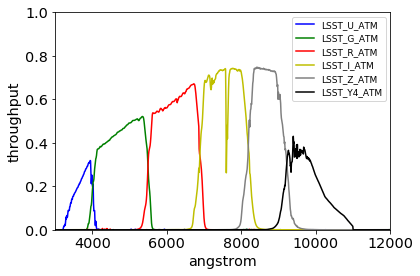

In [198]:
plt.plot(bp_u_atm.wave, bp_u_atm.throughput, 'b',
...          bp_g_atm.wave, bp_g_atm.throughput, 'g')
plt.plot(bp_r_atm.wave, bp_r_atm.throughput, 'r',
...          bp_i_atm.wave, bp_i_atm.throughput,'y')
plt.plot(bp_z_atm.wave, bp_z_atm.throughput, color='grey')
plt.plot(bp_y4_atm.wave, bp_y4_atm.throughput, color='k')
plt.xlim(3000, 12000)
plt.ylim(0, 1.)
plt.xlabel(bp_u_atm.waveunits)
plt.ylabel('throughput')
plt.legend([bp_u_atm.name, bp_g_atm.name,bp_r_atm.name, bp_i_atm.name,bp_z_atm.name, bp_y4_atm.name], loc=1,fontsize=9)

# Observation

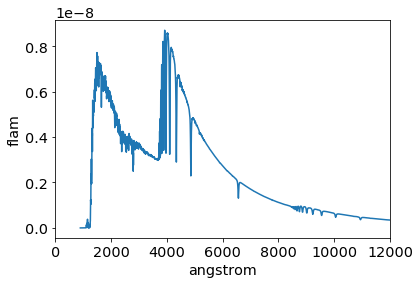

In [191]:
plt.plot(S.Vega.wave,S.Vega.flux)
plt.xlim(0.,12000)
plt.xlabel(S.Vega.waveunits)
plt.ylabel(S.Vega.fluxunits)
#plt.title(S.Vega.name)

In [192]:
obs_u = S.Observation(S.Vega,bp_u_atm)
obs_g = S.Observation(S.Vega,bp_g_atm)
obs_r = S.Observation(S.Vega,bp_r_atm)
obs_i = S.Observation(S.Vega,bp_i_atm)
obs_z = S.Observation(S.Vega,bp_z_atm)
obs_y4 = S.Observation(S.Vega,bp_y4_atm)

(LSST_U_ATM) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_G_ATM) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_R_ATM) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_I_ATM) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Z_ATM) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(LSST_Y4_ATM) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [193]:
obs_u.primary_area=S.primary_area
obs_u.binning=S.binning


/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_008.fits * LSST_U_ATM


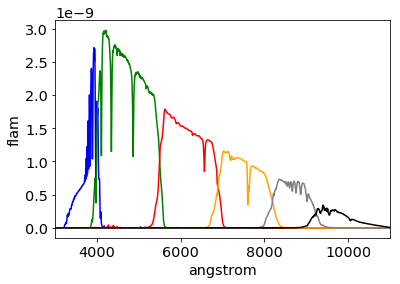

In [199]:
plt.plot(obs_u.wave,obs_u.flux,'b')
plt.plot(obs_g.wave,obs_g.flux,'g')
plt.plot(obs_r.wave,obs_r.flux,'r')
plt.plot(obs_i.wave,obs_i.flux,color='orange')
plt.plot(obs_z.wave,obs_z.flux,color='grey')
plt.plot(obs_y4.wave,obs_y4.flux,'k')
plt.xlim(3000.,11000)
plt.xlabel(obs_u.waveunits)
plt.ylabel(obs_u.fluxunits)
#plt.title(S.Vega.name)
print obs_u.name

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/pysynphot/data/generic/alpha_lyr_stis_008.fits * LSST_U_ATM


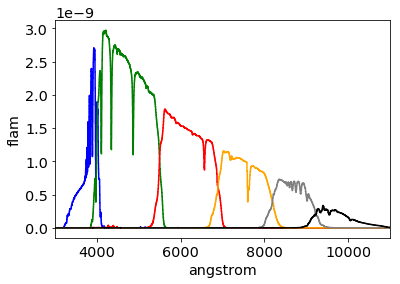

In [202]:
plt.plot(obs_u.binwave,obs_u.binflux,'b',drawstyle='steps-mid')
plt.plot(obs_g.binwave,obs_g.binflux,'g',drawstyle='steps-mid')
plt.plot(obs_r.binwave,obs_r.binflux,'r',drawstyle='steps-mid')
plt.plot(obs_i.binwave,obs_i.binflux,color='orange',drawstyle='steps-mid')
plt.plot(obs_z.binwave,obs_z.binflux,color='grey',drawstyle='steps-mid')
plt.plot(obs_y4.binwave,obs_y4.binflux,'k',drawstyle='steps-mid')
plt.xlim(3000.,11000)
plt.xlabel(obs_u.waveunits)
plt.ylabel(obs_u.fluxunits)
#plt.title(S.Vega.name)
print obs_u.name

In [180]:
print obs_u.primary_area

60000.0


In [184]:
print obs_u.binning

10.0


### Magnitude

In [208]:
print obs_u.effstim('obmag') 

-24.8460307096


In [211]:
-2.5*np.log10(obs_u.binflux.sum())

-24.84599220818626

In [212]:
obs_u.convert('counts')

# Reference data

In [167]:
 S.showref()

thermtable: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True
 comptable: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/mtab/0ac1951am_tmc.fits
graphtable: /Users/dagoret-campagnesylvie/MacOsX/External/PySyn_CDBS/grp/hst/cdbs/mtab/0bf2050hm_tmg.fits
      area: 45238.93416


# Catalog

In [168]:
from astropy.io import fits
filename = os.path.join(os.environ['PYSYN_CDBS'], 'comp', 'nicmos', 'nic2_f110w_002_th.fits')
with fits.open(filename) as pf:
    print(pf[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   12 / width of table in bytes                        NAXIS2  =                 1999                                                  PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    3                                                  TTYPE1  = 'WAVELENGTH'         / label for field   1                            TFORM1  = '1E      '           / data format of field: 4-byte REAL              TUNIT1  = 'ANGSTROMS'          / physical unit of field                         TTYPE2  = 'EMISSIVITY'         / label for field   2                            TFORM2  = '1E      '           / data fo

In [169]:
pf[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 1999                                                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3                                                  
TTYPE1  = 'WAVELENGTH'         / label for field   1                            
TFORM1  = '1E      '           / data format of field: 4-byte REAL              
TUNIT1  = 'ANGSTROMS'          / physical unit of field                         
TTYPE2  = 'EMISSIVITY'         / label for field   2                            
TFORM2  = '1E      '        

In [170]:
sp = S.Icat('ck04models', 10000, 0.1, 3.0)

In [171]:
sp

In [172]:
from astropy.io import fits
filename = os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'k93models', 'kp00', 'kp00_8000.fits')
hdr = fits.getheader(filename)
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 1999-03-22                     
FILENAME= 'kp00_8000.fits'     / name of file                                   
TEFF    =                 8000                                                  
LOG_Z   = 0.00000000000000E+00                                                  
HISTORY   g10               

In [173]:
filename = os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'k93models', 'kp01', 'kp01_10000.fits')
spec = fits.getdata(filename)
wave = spec['WAVELENGTH']
flux = spec['g30']

(0, 10000)

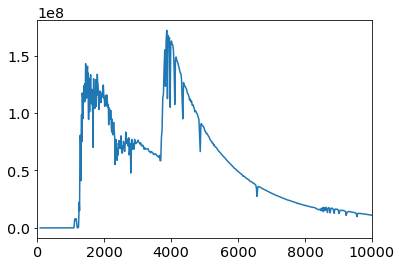

In [174]:
plt.plot(wave,flux)
plt.xlim(0,10000)

In [175]:
sp = S.Icat('k93models', 10000, 0.1, 3.0)

## HST Calibration Spectra

The $PYSYN_CDBS/calspec directory contains the composite stellar spectra that are the fundamental flux standards for HST calibrations. All files are in machine-independent binary FITS table format. Information about the pedigree of a given spectrum is in the header of the FITS table file, which can be read using astropy.io.fits. The example below reads the header from G191B2B spectrum and then loads it into pysynphot:

In [176]:
from astropy.io import fits
filename = os.path.join(os.environ['PYSYN_CDBS'], 'calspec', 'g191b2b_mod_010.fits')
hdr = fits.getheader(filename)
hdr

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2015-01-06T17:00:20' / Date FITS file was generated                  
IRAF-TLM= '2015-01-06T17:00:24' / Time of last modification                     
SOURCE  = 'Bohlin, Gordon, Tremblay 2014, PASP, 126, 711' /                     
COMMENT = 'Rauch: METAL LINE BLANKETED NLTE MODEL' /                            
TEFFGRAV= '59000/7.60'         /Teff/log g for model                            
DESCRIP = 'MODEL Fluxes ------------------------------------------------------' 
DBTABLE = 'CRSPECTRUM'         /                                                
TARGETID= 'G191B2B_MOD'     